# 5. MJO

This notebook demonstrates the basic usage of the Madden-Julian Oscillation (MJO) metrics driver.

Before running this demo, please ensure that the sample data has been downloaded by running the [Demo 0](http://pcmdi.github.io/pcmdi_metrics/examples/Demo_0_download_data.html): Download Data notebook, if you haven't already.

Scientific information about the MJO metrics is available through the [README](https://github.com/PCMDI/pcmdi_metrics/tree/master/pcmdi_metrics/mjo).

References:

* Lee, J., P. J. Gleckler, M.-S. Ahn, A. Ordonez, P. Ullrich, K. R. Sperber, K. E. Taylor, Y. Y. Planton, E. Guilyardi, P. Durack, C. Bonfils, M. D. Zelinka, L.-W. Chao, B. Dong, C. Doutriaux, C. Zhang, T. Vo, J. Boutte, M. F. Wehner, A. G. Pendergrass, D. Kim, Z. Xue, A. T. Wittenberg, and J. Krasting, 2024: Systematic and Objective Evaluation of Earth System Models: PCMDI Metrics Package (PMP) version 3. Geoscientific Model Development, 17, 3919–3948, [doi: 10.5194/gmd-17-3919-2024](https://doi.org/10.5194/gmd-17-3919-2024).
* Ahn, M.-S., D. Kim, K. R. Sperber, I.-S. Kang, E. Maloney, D. Waliser, H. Hendon, 2017: MJO simulation in CMIP5 climate models: MJO skill metrics and process-oriented diagnosis. Clim. Dynam., 49, 4023-4045. [doi: 10.1007/s00382-017-3558-4](https://doi.org/10.1007/s00382-017-3558-4).

First we load the demo directory choices (read from `user_choices.py` file in the current directory, which is generated when running the [Demo 0](http://pcmdi.github.io/pcmdi_metrics/examples/Demo_0_download_data.html)):

In [1]:
from user_choices import demo_data_directory, demo_output_directory

The `--help` flag is available to provide more information on the mjo_metrics_driver:

In [2]:
%%bash
mjo_metrics_driver.py --help

usage: mjo_metrics_driver.py [-h] [--parameters PARAMETERS]
                             [--diags OTHER_PARAMETERS [OTHER_PARAMETERS ...]]
                             [--results_dir RESULTS_DIR]
                             [--reference_data_path REFERENCE_DATA_PATH]
                             [--modpath MODPATH] [--mip MIP] [--exp EXP]
                             [--frequency FREQUENCY] [--realm REALM]
                             [--reference_data_name REFERENCE_DATA_NAME]
                             [--reference_data_lf_path REFERENCE_DATA_LF_PATH]
                             [--modpath_lf MODPATH_LF] [--varOBS VAROBS]
                             [--varModel VARMODEL]
                             [--ObsUnitsAdjust OBSUNITSADJUST]
                             [--ModUnitsAdjust MODUNITSADJUST] [--units UNITS]
                             [--osyear OSYEAR] [--msyear MSYEAR]
                             [--oeyear OEYEAR] [--meyear MEYEAR]
                             [--seasons S

### Basic Use

The MJO driver can read a parameter file to load user settings. A basic parameter file is shown here:

In [3]:
with open("basic_mjo_param.py") as f:
    print(f.read())

import os

#
#  OPTIONS ARE SET BY USER IN THIS FILE AS INDICATED BELOW BY:
#
#

case_id = 'Ex1'
realization = 'r6i1p1'

# ROOT PATH FOR MODELS CLIMATOLOGIES
modnames = ['GISS-E2-H']
modpath = 'demo_data_tmp/CMIP5_demo_timeseries/historical/atmos/day/pr/pr_day_%(model)_historical_r6i1p1_20000101-20051231.nc'
varModel = 'pr'
ModUnitsAdjust = (True, 'multiply', 86400.0, 'mm d-1')  # kg m-2 s-1 to mm day-1
units = 'mm/d'
msyear = 2000
meyear = 2002
seasons = ['NDJFMA', 'MJJASO']

# ROOT PATH FOR OBSERVATIONS
reference_data_name = 'GPCP-IP'
reference_data_path = 'demo_data_tmp/obs4MIPs_PCMDI_daily/NASA-JPL/GPCP-1-3/day/pr/gn/latest/pr_day_GPCP-1-3_PCMDI_gn_19961002-20170101.nc'
varOBS = 'pr'
ObsUnitsAdjust = (True, 'multiply', 86400.0, 'mm d-1')  # kg m-2 s-1 to mm day-1
osyear = 1998
oeyear = 1999

# DIRECTORY WHERE TO PUT RESULTS
results_dir = 'demo_output_tmp/mjo/%(case_id)'

# MISCELLANEOUS
nc_out = False
plot = True  # Create map graphics
update_json = True



This parameter file can be passed to the mjo driver via the command line:
```
mjo_metrics_driver.py -p basic_mjo_param.py
```

This example is run as a subprocess in the next cell.

In [4]:
%%bash
mjo_metrics_driver.py -p basic_mjo_param.py --debug True

includeOBS: True
models: ['GISS-E2-H']
realization:  r6i1p1
output directories:
graphics : demo_output_tmp/mjo/Ex1
diagnostic_results : demo_output_tmp/mjo/Ex1
metrics_results : demo_output_tmp/mjo/Ex1
CMEC: False
debug:  True
parallel: False
 -----  obs  ---------------------
 ---  GPCP-IP  ---
demo_data_tmp/obs4MIPs_PCMDI_daily/NASA-JPL/GPCP-1-3/day/pr/gn/latest/pr_day_GPCP-1-3_PCMDI_gn_19961002-20170101.nc
 --  NDJFMA  --
debug: open file: demo_data_tmp/obs4MIPs_PCMDI_daily/NASA-JPL/GPCP-1-3/day/pr/gn/latest/pr_day_GPCP-1-3_PCMDI_gn_19961002-20170101.nc
debug: check time
debug: startYear, endYear: 1998 1999
debug: NL, NT: 144 180
debug: before year loop: daSeaCyc.shape: (180, 180, 360)
1998
Converting units by  multiply 86400.0
debug: year, segment[year][data_var].shape: 1998 (180, 180, 360)
debug: after year loop: daSeaCyc.shape: (180, 180, 360)
debug: year loop start
chk: year: 1998
debug: ds_regrid_subset[data_var] shape: (180, 8, 144)
debug: compute space-time spectrum
OEE: <xar

INFO::2025-09-09 13:32::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/mjo/Ex1/mjo_stat_cmip5_historical_da_atm_obs_GPCP-IP_2000-2002.json
2025-09-09 13:32:42,528 [INFO]: base.py(write:344) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/mjo/Ex1/mjo_stat_cmip5_historical_da_atm_obs_GPCP-IP_2000-2002.json
2025-09-09 13:32:42,528 [INFO]: base.py(write:344) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/mjo/Ex1/mjo_stat_cmip5_historical_da_atm_obs_GPCP-IP_2000-2002.json
INFO::2025-09-09 13:32::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/mjo/Ex1/mjo_stat_cmip5_historica

Done
 -----  GISS-E2-H  ---------------------
debug: model_path_list:  ['demo_data_tmp/CMIP5_demo_timeseries/historical/atmos/day/pr/pr_day_GISS-E2-H_historical_r6i1p1_20000101-20051231.nc']
 ---  r6i1p1  ---
demo_data_tmp/CMIP5_demo_timeseries/historical/atmos/day/pr/pr_day_GISS-E2-H_historical_r6i1p1_20000101-20051231.nc
 --  NDJFMA  --
debug: open file: demo_data_tmp/CMIP5_demo_timeseries/historical/atmos/day/pr/pr_day_GISS-E2-H_historical_r6i1p1_20000101-20051231.nc
debug: check time
debug: startYear, endYear: 2000 2002
debug: NL, NT: 144 180
debug: before year loop: daSeaCyc.shape: (180, 90, 144)
2000
Converting units by  multiply 86400.0
debug: year, segment[year][data_var].shape: 2000 (180, 90, 144)
2001
Converting units by  multiply 86400.0
debug: year, segment[year][data_var].shape: 2001 (180, 90, 144)
debug: after year loop: daSeaCyc.shape: (180, 90, 144)
debug: year loop start
chk: year: 2000
debug: ds_regrid_subset[data_var] shape: (180, 8, 144)
debug: compute space-time sp

INFO::2025-09-09 13:33::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/mjo/Ex1/mjo_stat_cmip5_historical_da_atm_GISS-E2-H_r6i1p1_2000-2002.json
2025-09-09 13:33:29,097 [INFO]: base.py(write:344) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/mjo/Ex1/mjo_stat_cmip5_historical_da_atm_GISS-E2-H_r6i1p1_2000-2002.json
2025-09-09 13:33:29,097 [INFO]: base.py(write:344) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/mjo/Ex1/mjo_stat_cmip5_historical_da_atm_GISS-E2-H_r6i1p1_2000-2002.json
INFO::2025-09-09 13:33::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/mjo/Ex1/mjo_stat_

Done


### Command line arguments

It is also possible to use the command line to pass other arguments to the MJO driver. The command line arguments will override the settings in the parameter file.

In these example, we change a few different things. The new `case_id` will show up as a new folder in the result directory because of how the `result_dir` variable is set in the parameter file. NetCDF output and plots will be saved. The analysis start and end years for the models are changed to match the observations.

The `includeOBS` flag means that results will also be generated for observations, while the `no_OBS` flag excludes observations.

In [5]:
%%bash
mjo_metrics_driver.py -p basic_mjo_param.py \
--case_id 'Ex2' \
--no_OBS \
--nc_out True \
--plot True \
--msyear 2000 \
--meyear 2005

includeOBS: False
models: ['GISS-E2-H']
realization:  r6i1p1
output directories:
graphics : demo_output_tmp/mjo/Ex2
diagnostic_results : demo_output_tmp/mjo/Ex2
metrics_results : demo_output_tmp/mjo/Ex2
CMEC: False
debug:  False
parallel: False
 -----  GISS-E2-H  ---------------------
 ---  r6i1p1  ---
demo_data_tmp/CMIP5_demo_timeseries/historical/atmos/day/pr/pr_day_GISS-E2-H_historical_r6i1p1_20000101-20051231.nc
 --  NDJFMA  --
2000
Converting units by  multiply 86400.0
2001
Converting units by  multiply 86400.0
2002
Converting units by  multiply 86400.0
2003
Converting units by  multiply 86400.0
2004
Converting units by  multiply 86400.0
chk: year: 2000
chk: year: 2001
chk: year: 2002
chk: year: 2003
chk: year: 2004
ewr:  1.549148912834605
east power:  0.005931412302887387
west power:  0.0038288199757595897
 --  MJJASO  --
2000
Converting units by  multiply 86400.0
2001
Converting units by  multiply 86400.0
2002
Converting units by  multiply 86400.0
2003
Converting units by  multi

INFO::2025-09-09 13:35::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/mjo/Ex2/mjo_stat_cmip5_historical_da_atm_GISS-E2-H_r6i1p1_2000-2005.json
2025-09-09 13:35:13,570 [INFO]: base.py(write:344) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/mjo/Ex2/mjo_stat_cmip5_historical_da_atm_GISS-E2-H_r6i1p1_2000-2005.json
2025-09-09 13:35:13,570 [INFO]: base.py(write:344) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/mjo/Ex2/mjo_stat_cmip5_historical_da_atm_GISS-E2-H_r6i1p1_2000-2005.json
INFO::2025-09-09 13:35::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/mjo/Ex2/mjo_stat_

Done


A png image is created showing the wavenumber-frequency power spectra.

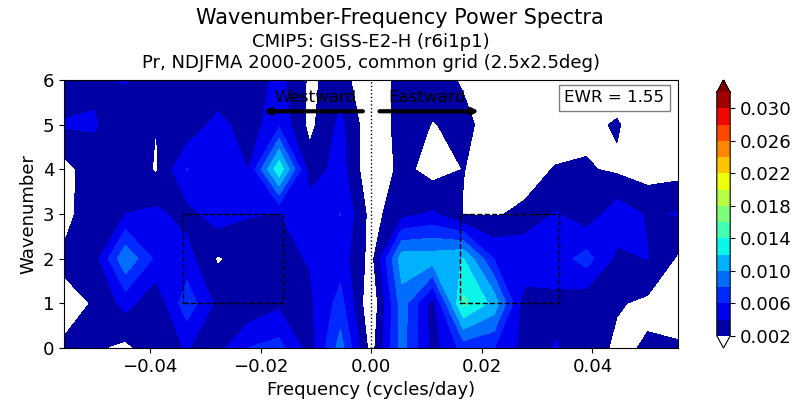

In [6]:
from IPython.display import Image
Image(filename=demo_output_directory+"/mjo/Ex2/cmip5_GISS-E2-H_historical_r6i1p1_mjo_2000-2005_NDJFMA_cmmGrid.png")